# Image Geometric Transform

圖像的幾何運算  
圖像的幾何運算包括平移、旋轉、翻轉、透視等等  
電腦圖學的圖象幾何變化都是經由矩陣運算得到的  

In [1]:
import os 
import cv2 as cv
import matplotlib.pyplot as plt

root = os.getcwd()
img_path = os.path.join(root,'Image/lena.jpg')

img = cv.imread(img_path,1)

## 圖像平移

平移的表達式  
$$ x = x_0 +\Delta x$$
$$ y = y_0 +\Delta y$$

亦即

$$ \left[\begin{matrix}x \cr y \cr 1 \end{matrix}\right]=
\left[\begin{matrix}1 & 0 & \Delta x \cr 0 & 1 & \Delta y \cr 0 & 0 & 1 \end{matrix}\right]
\left[\begin{matrix}x_0 \cr y_0 \cr 1 \end{matrix}\right]$$

可以利用以下矩陣定義來做平移運算的矩陣    
$$M = \left[\begin{matrix}1 & 0 & \Delta x \cr 0 & 1 & \Delta y \end{matrix}\right]$$

藉由openCV的函式warpAffine帶入
* 原始圖像
* 運算矩陣
* 變換後的圖象大小，如果與原圖不符，將會插值

(<matplotlib.axes._subplots.AxesSubplot at 0x2597da639b0>,
 <matplotlib.image.AxesImage at 0x2597dd7ae10>)

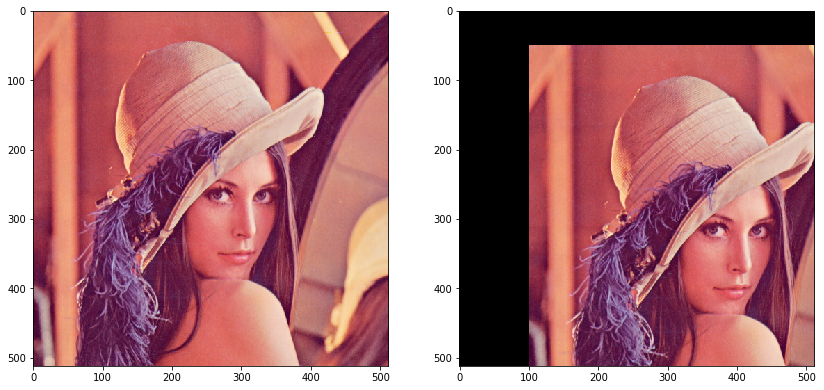

In [2]:
import numpy as np

M = np.float32([[1,0,100],[0,1,50]])
rows,cols = img.shape[:2]

res = cv.warpAffine(img,M,(rows,cols))


plt.figure(figsize=(14,7))
plt.subplot(121),plt.imshow(img[:,:,::-1])
plt.subplot(122),plt.imshow(res[:,:,::-1])

## 旋轉
將圖像做旋轉

x’ = xcosθ − ysinθ 与 y。’ = xsinθ + ycosθ

平移的表達式  
$$ x' = xcos\theta -ysin\theta$$
$$ y' = xsin\theta +ycos\theta$$

可以利用以下矩陣定義來做平移運算的矩陣    
$$M = \left[\begin{matrix} cos\theta& -sin\theta  \cr sin\theta & cos\theta \end{matrix}\right]$$

但此矩陣是以原點(0,0)為中心作為旋轉的矩陣  
opencv採用了另一種矩陣

$$M = \left[\begin{matrix} \alpha & -\beta & (1-\alpha)center_x-\beta center_y  \cr
                           -\beta & \alpha & \beta center_x + (1-\alpha)center_y \end{matrix}\right]$$


openCV建立了函式getRotationMatrix2D來定義此矩陣，分別需要定義
* 旋轉中心
* 旋轉角度
* 縮放比例

再利用warpAffine執行

(<matplotlib.axes._subplots.AxesSubplot at 0x2597dfcdd68>,
 <matplotlib.image.AxesImage at 0x2597ddeef28>)

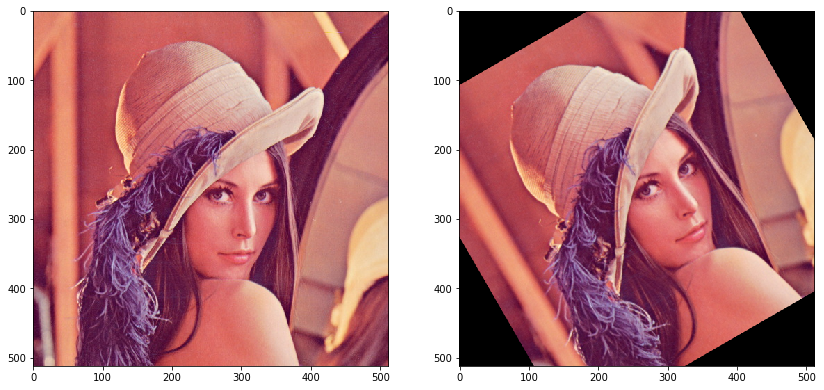

In [3]:
M = cv.getRotationMatrix2D((rows/2,cols/2),30,1)

res2 = cv.warpAffine(img,M,(rows,cols))


plt.figure(figsize=(14,7))
plt.subplot(121),plt.imshow(img[:,:,::-1])
plt.subplot(122),plt.imshow(res2[:,:,::-1])

### 仿射變換  
仿射變換  
2D平面上的圖象的旋轉與縮放後的圖與原圖之間的變換矩陣的仿射  
仿射矩陣的計算可以透過opencv的仿射矩陣生成式來獲得  
getAffineTransform，需要代入兩個參數，分別為兩張圖相同的特徵點  
每個參數的特徵點需要三點座標
![](https://i.imgur.com/lo4Uxxp.png)

(<matplotlib.axes._subplots.AxesSubplot at 0x2597de53780>,
 <matplotlib.image.AxesImage at 0x2597f18d9e8>)

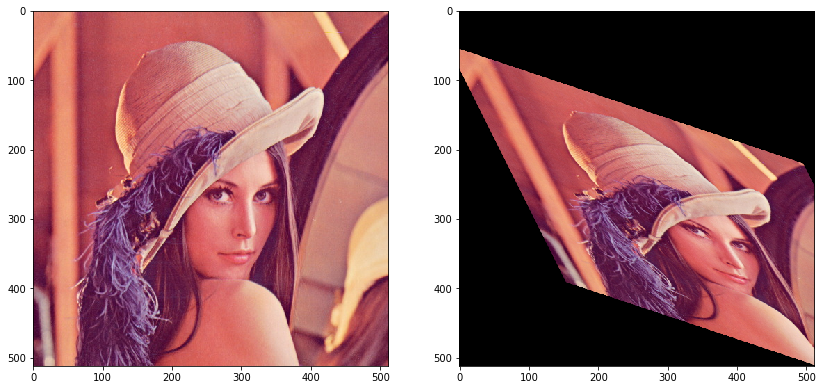

In [4]:
p1 = np.float32([[50,50],[200,50],[50,200]])
p2 = np.float32([[50,100],[200,150],[100,200]])
M = cv.getAffineTransform(p1,p2)

res3 = cv.warpAffine(img,M,(rows,cols))

plt.figure(figsize=(14,7))
plt.subplot(121),plt.imshow(img[:,:,::-1])
plt.subplot(122),plt.imshow(res3[:,:,::-1])

## 透射變換
相對於2D平面上的仿射變換，透射變換即為三維空間上的  
透射變換的轉換矩陣的計算可以透過opencv的透射矩陣生成式來獲得  
getPerspectiveTransform，需要代入兩個參數，分別為兩張圖相同的特徵點  
每個參數的特徵點需要四點座標

![](https://i.imgur.com/EMcofCU.png)

(<matplotlib.axes._subplots.AxesSubplot at 0x2597f3dc160>,
 <matplotlib.image.AxesImage at 0x2597f1bdda0>)

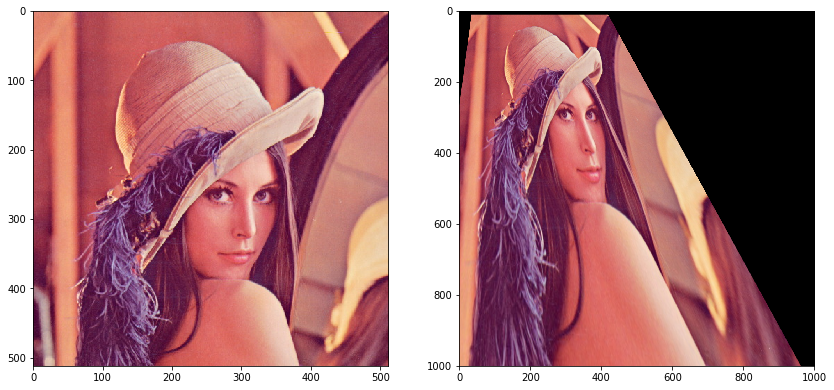

In [5]:
p1 = np.float32([[100,50],[200,50],[50,200],[200,200]])
p2 = np.float32([[110,50],[190,50],[60,200],[210,200]])
M = cv.getPerspectiveTransform(p1,p2)

res4 = cv.warpPerspective(img,M,(1000,1000))

plt.figure(figsize=(14,7))
plt.subplot(121),plt.imshow(img[:,:,::-1])
plt.subplot(122),plt.imshow(res4[:,:,::-1])